Réseau de Perceptron Simple pour Reconnaissance de Lettres

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pour la reproductibilité
np.random.seed(42)

# Fonctions d'activation et propagation

In [2]:
def heaviside(x):
    """Fonction d'activation Heaviside vectorisée : retourne 1 si x >= 0, sinon 0."""
    return np.where(np.asarray(x) >= 0, 1, 0)

def forward_pass(W, x, theta=1.0):
    """
    Calcule la sortie de chaque neurone de sortie (2 neurones).
    
    Paramètres:
      - W : matrice de poids de forme (2, 20)
      - x : vecteur d'entrée de forme (20,)
      - theta : seuil d'activation
      
    Retourne:
      - y : vecteur de sortie (2,)
    """
    s = W.dot(x) - theta
    return np.where(s >= 0, 1, 0)

def update_weights(W, x, y_target, y_pred, mu=0.1):
    """
    Met à jour la matrice de poids W selon la règle du Perceptron de manière vectorisée.
    
    Paramètres:
      - W : matrice de poids de forme (2, 20)
      - x : vecteur d'entrée (20,)
      - y_target : sortie attendue (2,)
      - y_pred : sortie prédite (2,)
      - mu : taux d'apprentissage
    """
    error = y_target - y_pred
    W += mu * np.outer(error, x)
    return W

def show_letter(pattern, title=''):
    """Affiche un motif 4x5 à partir d'un vecteur (20 pixels)."""
    plt.imshow(pattern.reshape((4, 5)), cmap='gray_r')
    plt.title(title)
    plt.axis('off')
    plt.show()

def add_noise(pattern, noise_level=0.1):
    """
    Inverse chaque pixel de 'pattern' avec une probabilité 'noise_level'.
    
    Paramètres:
      - pattern : vecteur 0/1 de taille 20
      - noise_level : probabilité d'inverser un pixel
      
    Retourne:
      - copie bruitée du pattern
    """
    noisy = pattern.copy()
    for i in range(len(noisy)):
        if np.random.rand() < noise_level:
            noisy[i] = 1 - noisy[i]
    return noisy

def test_generalization(W, pattern, target, noise_level, theta=1.0, trials=1000):
    """
    Évalue la performance du réseau sur un motif bruité en calculant le taux de bonne classification.
    """
    correct = 0
    for _ in range(trials):
        noisy_pattern = add_noise(pattern, noise_level)
        y_pred = forward_pass(W, noisy_pattern, theta)
        if np.array_equal(y_pred, target):
            correct += 1
    return correct / trials


# Définition des motifs de lettres


In [3]:
# Lettre A (4 lignes x 5 colonnes)
letter_A_4x5 = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1]
])
pattern_A = letter_A_4x5.flatten()

# Lettre C (4 lignes x 5 colonnes)
letter_C_4x5 = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1]
])
pattern_C = letter_C_4x5.flatten()

# Cibles pour les lettres A et C
target_A = np.array([1, 0])
target_C = np.array([0, 1])


# Fonctions d'entraînement du Perceptron
#
Deux stratégies d'entraînement sont proposées :
#
- **Alternée** : on présente alternativement les motifs A et C à chaque itération.
- **Séquentielle** : on apprend d'abord le motif A jusqu'à ce qu'il soit correctement classé, puis le motif C.


In [4]:
def train_perceptron_alternating(W, 
                                pattern_A, target_A, 
                                pattern_C, target_C,
                                mu=0.1, theta=1.0, max_iterations=1000):
    """
    Entraîne le perceptron en présentant A puis C à chaque itération.
    Retourne l'historique de l'erreur et la matrice de poids finale.
    """
    errors = []
    for iteration in range(max_iterations):
        # Présentation de A
        y_pred_A = forward_pass(W, pattern_A, theta)
        W = update_weights(W, pattern_A, target_A, y_pred_A, mu)
        
        # Présentation de C
        y_pred_C = forward_pass(W, pattern_C, theta)
        W = update_weights(W, pattern_C, target_C, y_pred_C, mu)
        
        # Mesure de l'erreur sur les deux motifs
        err_A = np.sum(np.abs(y_pred_A - target_A))
        err_C = np.sum(np.abs(y_pred_C - target_C))
        total_error = err_A + err_C
        errors.append(total_error)
        
        # Arrêt si les deux motifs sont correctement classés
        if total_error == 0:
            print(f"Entraînement convergé à l’itération {iteration}.")
            break
    return W, errors

def train_perceptron_sequential(W, 
                                pattern_A, target_A, 
                                pattern_C, target_C,
                                mu=0.1, theta=1.0, max_iterations=1000):
    """
    Entraîne le perceptron en présentant d'abord le motif A jusqu'à le classer correctement,
    puis le motif C.
    """
    errors = []
    iteration = 0
    
    # Apprendre A d'abord
    while iteration < max_iterations:
        y_pred_A = forward_pass(W, pattern_A, theta)
        W = update_weights(W, pattern_A, target_A, y_pred_A, mu)
        err_A = np.sum(np.abs(y_pred_A - target_A))
        errors.append(err_A)
        iteration += 1
        if err_A == 0:
            print(f"Motif A appris après {iteration} itérations.")
            break
    
    # Apprendre C ensuite
    while iteration < max_iterations:
        y_pred_C = forward_pass(W, pattern_C, theta)
        W = update_weights(W, pattern_C, target_C, y_pred_C, mu)
        err_C = np.sum(np.abs(y_pred_C - target_C))
        errors.append(err_C)
        iteration += 1
        if err_C == 0:
            print(f"Motif C appris après {iteration} itérations (suite).")
            break
    
    return W, errors

Alterné 

Affichage des motifs A et C :


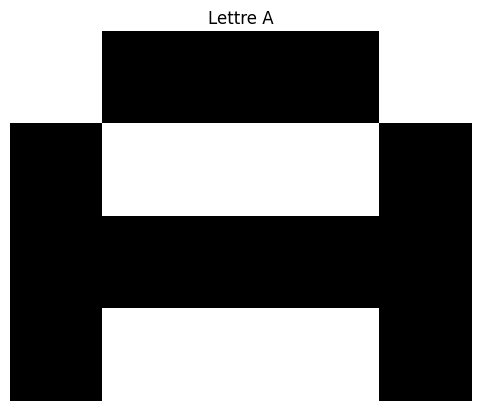

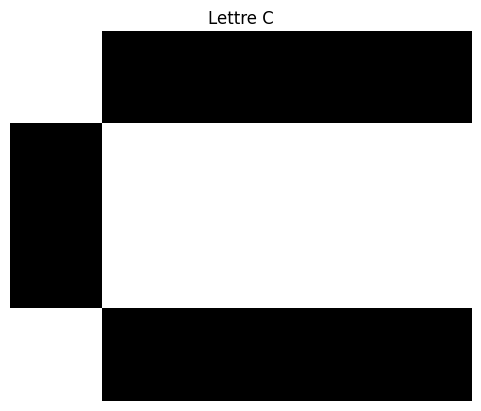

=== Entraînement alterné A / C ===
Entraînement convergé à l’itération 3.


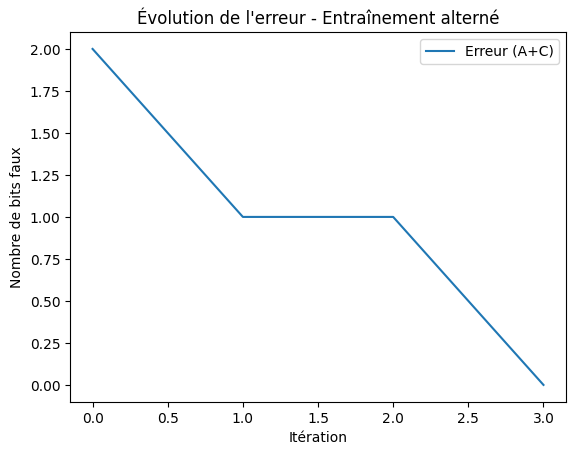

In [5]:
if __name__ == "__main__":
    # Affichage des motifs
    print("Affichage des motifs A et C :")
    show_letter(pattern_A, title="Lettre A")
    show_letter(pattern_C, title="Lettre C")
    
    # Paramètres
    input_size = 20
    output_size = 2
    theta = 1.0
    mu = 0.1
    max_iterations = 1000
    
    # Initialisation aléatoire des poids
    W_init = np.random.uniform(-0.1, 0.1, (output_size, input_size))
    
    ##########################
    # Entraînement Alterné
    ##########################
    print("=== Entraînement alterné A / C ===")
    W_alt, errors_alt = train_perceptron_alternating(
        W_init.copy(), pattern_A, target_A, 
        pattern_C, target_C, 
        mu=mu, theta=theta, max_iterations=max_iterations
    )
    plt.figure()
    plt.plot(errors_alt, label='Erreur (A+C)')
    plt.title("Évolution de l'erreur - Entraînement alterné")
    plt.xlabel("Itération")
    plt.ylabel("Nombre de bits faux")
    plt.legend()
    plt.show()

# Entraînement Séquentiel


=== Entraînement séquentiel : A puis C ===
Motif A appris après 2 itérations.
Motif C appris après 5 itérations (suite).


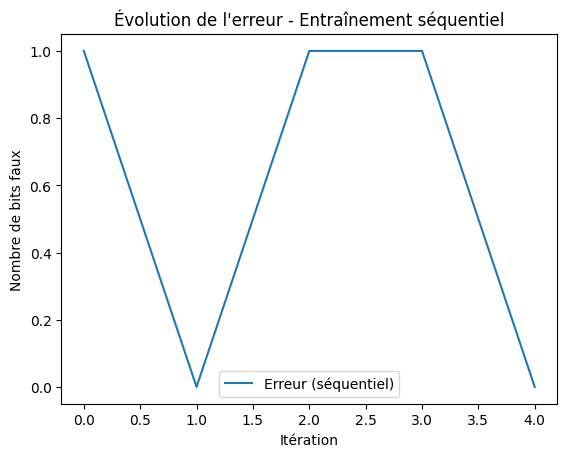

In [ ]:
    print("=== Entraînement séquentiel : A puis C ===")
    W_seq, errors_seq = train_perceptron_sequential(
        W_init.copy(), pattern_A, target_A, 
        pattern_C, target_C,
        mu=mu, theta=theta, max_iterations=max_iterations
    )
    plt.figure()
    plt.plot(errors_seq, label='Erreur (séquentiel)')
    plt.title("Évolution de l'erreur - Entraînement séquentiel")
    plt.xlabel("Itération")
    plt.ylabel("Nombre de bits faux")
    plt.legend()
    plt.show()

# Test de classification finale sur A et C


In [8]:
print("\n=== Test final sur A et C (avec W_alt) ===")
yA_alt = forward_pass(W_alt, pattern_A, theta)
yC_alt = forward_pass(W_alt, pattern_C, theta)
print(f"Sortie prédite (A) : {yA_alt}   /   Sortie attendue : {target_A}")
print(f"Sortie prédite (C) : {yC_alt}   /   Sortie attendue : {target_C}")
    


=== Test final sur A et C (avec W_alt) ===
Sortie prédite (A) : [1 0]   /   Sortie attendue : [1 0]
Sortie prédite (C) : [0 1]   /   Sortie attendue : [0 1]


# Test de robustesse



=== Test de généralisation : influence du bruit ===


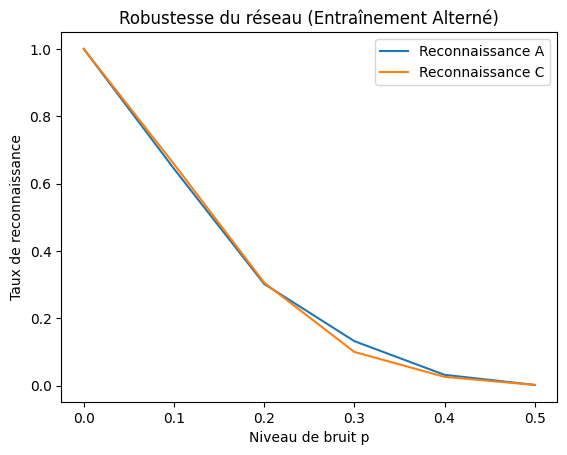


=== Test de généralisation : influence du bruit (Entraînement Séquentiel) ===


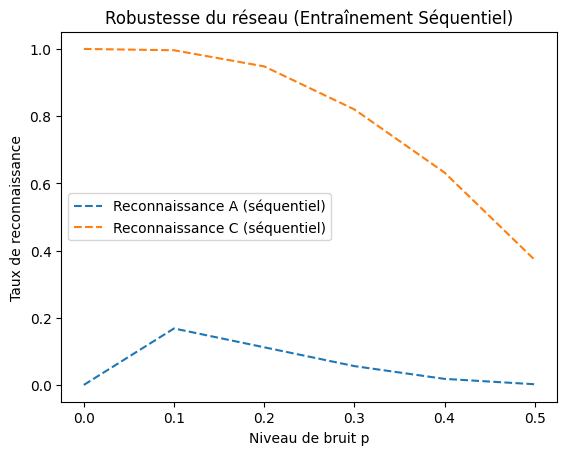

Taux de reconnaissance (A) pour différents p (séquentiel) : [0.0, 0.168, 0.112, 0.056, 0.018, 0.002]
Taux de reconnaissance (C) pour différents p (séquentiel) : [1.0, 0.996, 0.948, 0.82, 0.632, 0.372]

Fin du script.


In [ ]:
    print("\n=== Test de généralisation : influence du bruit ===")
    p_values = np.linspace(0, 0.5, 6)
    accuracy_A_alt = []
    accuracy_C_alt = []
    
    for p in p_values:
        accA = test_generalization(W_alt, pattern_A, target_A, p, theta=theta, trials=500)
        accC = test_generalization(W_alt, pattern_C, target_C, p, theta=theta, trials=500)
        accuracy_A_alt.append(accA)
        accuracy_C_alt.append(accC)
    
    plt.figure()
    plt.plot(p_values, accuracy_A_alt, label='Reconnaissance A')
    plt.plot(p_values, accuracy_C_alt, label='Reconnaissance C')
    plt.xlabel("Niveau de bruit p")
    plt.ylabel("Taux de reconnaissance")
    plt.title("Robustesse du réseau (Entraînement Alterné)")
    plt.legend()
    plt.show()
    
    # Test de robustesse pour l'entraînement séquentiel
    print("\n=== Test de généralisation : influence du bruit (Entraînement Séquentiel) ===")
    accuracy_A_seq = []
    accuracy_C_seq = []
    
    for p in p_values:
        accA_seq = test_generalization(W_seq, pattern_A, target_A, p, theta=theta, trials=500)
        accC_seq = test_generalization(W_seq, pattern_C, target_C, p, theta=theta, trials=500)
        accuracy_A_seq.append(accA_seq)
        accuracy_C_seq.append(accC_seq)
    
    plt.figure()
    plt.plot(p_values, accuracy_A_seq, label='Reconnaissance A (séquentiel)', linestyle='--')
    plt.plot(p_values, accuracy_C_seq, label='Reconnaissance C (séquentiel)', linestyle='--')
    plt.xlabel("Niveau de bruit p")
    plt.ylabel("Taux de reconnaissance")
    plt.title("Robustesse du réseau (Entraînement Séquentiel)")
    plt.legend()
    plt.show()
    
    print("Taux de reconnaissance (A) pour différents p (séquentiel) :", accuracy_A_seq)
    print("Taux de reconnaissance (C) pour différents p (séquentiel) :", accuracy_C_seq)
    
    print("\nFin du script.")